In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [15]:
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [16]:
X = train_dataset.iloc[:, [1,2,3,5]].values
y = train_dataset.iloc[:, 6].values

#Encoding the category of the questions column
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
onehotencoder = OneHotEncoder(categorical_features=[0])
X = onehotencoder.fit_transform(X).toarray()



In [17]:
train_dataset.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [18]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3942.0,2.0,7855.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26046.0,12.0,55801.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1358.0,4.0,8067.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,3.0,27064.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4271.0,4.0,13986.0


In [19]:
#So as to remove the dependant variable paradox
X = X[:, [0,1,2,3,4,5,6,8,9,10,11,12]]

from sklearn.cross_validation import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [21]:
train_dataset.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [22]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
y_pred_valid = regressor.predict(X_valid)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_valid, y_pred_valid)

815391.0271817372

In [33]:
X_test = test_dataset.iloc[:, [1,2,3,5]].values

#Encoding the category of the questions column
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
labelencoder = LabelEncoder()
X_test[:, 0] = labelencoder.fit_transform(X_test[:, 0])
onehotencoder = OneHotEncoder(categorical_features=[0])
X_test = onehotencoder.fit_transform(X_test).toarray()



In [34]:
#So as to remove the dependant variable paradox
X_test = X_test[:, [0,1,2,3,4,5,6,8,9,10,11,12]]

X_test = sc.transform(X_test)

In [35]:
y_pred = regressor.predict(X_test)

In [51]:
#Here I will take care of the various negative values in the data by taking into account the various ranges of negative values
for i in y_pred:
    if i<-30:
        i = 250
    elif i>-30 and i<-25:
        i = 50
    elif i>-25 and i<-20:
        i = 25
    elif i>-20 and i<-15:
        i = 40
    elif i>-15 and i<-10:
        i = 100
    elif i>-10 and i<-5:
        i = 20
    elif i>-5 and i<0:
        i = 75

In [52]:
df = pd.DataFrame()

In [53]:
df['ID'] = test_dataset.iloc[:, 0]

In [54]:
df['Upvotes'] = y_pred

In [55]:
df.head()

,ID,Upvotes
0,366953,177.174484
1,71864,419.162689
2,141692,57.781078
3,316833,32.432655
4,440445,285.281738


In [56]:
df.to_csv('XGboost_model_with_corrections.csv')

In [26]:
df1 = pd.DataFrame()

In [27]:
df1['Real'] = y_valid

In [28]:
df1['Predicted'] = y_pred_valid

In [30]:
df1.head()

,Real,Predicted
0,16.0,-11.067939
1,40.0,32.432655
2,6.0,-29.334867
3,13.0,129.792892
4,99.0,-11.067939


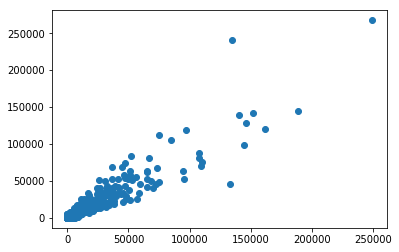

In [31]:
plt.scatter(df1['Real'], df1['Predicted'])

Text(0,0.5,'Predicted')

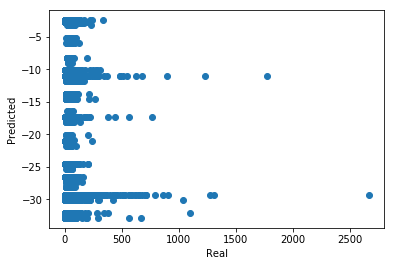

In [32]:
X = df1[df1['Predicted']<0]

plt.scatter(X['Real'], X['Predicted'])
plt.xlabel('Real')
plt.ylabel('Predicted')

In [38]:
X.mean()

Real         15.979923
Predicted   -25.297774
dtype: float64

In [41]:
X_5 = X[X > -5]
X_5.mean()

Real         15.979923
Predicted    -2.613305
dtype: float64

In [50]:
X_10 = X[X > -10]
X_10.mean()

Real         15.979923
Predicted    -3.037500
dtype: float64

In [43]:
X_15 = X[X > -15]
X_15.mean()

Real         15.979923
Predicted    -9.076039
dtype: float64

In [44]:
X_20 = X[X > -20]
X_20.mean()

Real         15.979923
Predicted   -10.101525
dtype: float64

In [46]:
X_25 = X[X > -25]
X_25.mean()

Real         15.979923
Predicted   -11.384331
dtype: float64

In [47]:
X_30 = X[X > -30]
X_30.mean()

Real         15.979923
Predicted   -24.784788
dtype: float64

In [61]:
y_pred.shape

(141448,)

In [82]:
rando = np.array([1,2,-4,-6,-4,-3])

In [86]:
i = 0
while i < rando.shape[0]:
    if rando[i]<0:
        rando[i] = 90
        
    i = i+1

In [87]:
rando

array([ 1,  2, 90, 90, 90, 90])